In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pywt
from pywt import wavedec

#### Q1. Generate a real chirp signal. Compute the subband decomposition of this signal upto three levels and plot the approximate and detail components.

In [2]:
def ChirpSignal(t,f0,t1,f1,phase=0):
  t0=t[0]
  T=t1-t0
  k=(f1-f0)/T
  x=np.cos(2*np.pi*(k/2*t+f0)*t+phase)
  return x

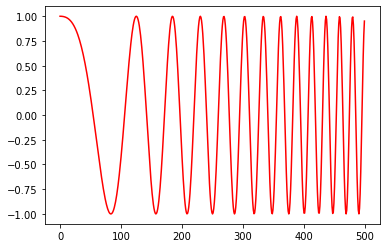

In [3]:
fs=500 
t=np.arange(0,1,1/fs) 

f0=1 
f1=fs/20 
x=ChirpSignal(t,f0,1,f1)
plt.plot(x,'r')

plt.show()

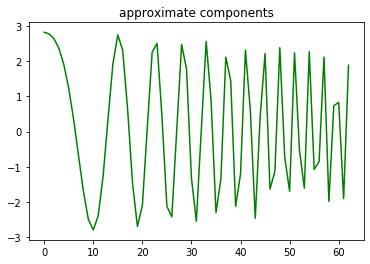

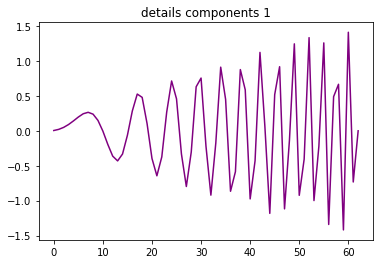

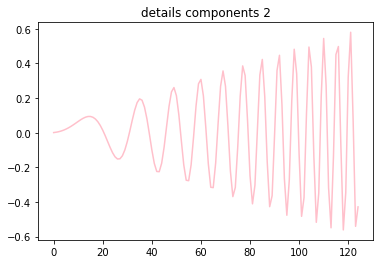

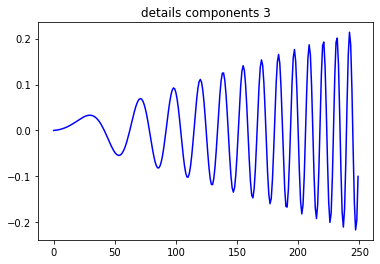

In [4]:
coeffs = wavedec(x, 'db1', level=3)
approx_det,coeff_det1,coeff_det2,coeff_det3=coeffs
plt.figure(1)
plt.plot(approx_det,'g')
plt.title("approximate components")
plt.show()
plt.figure(2)
plt.plot(coeff_det1,'purple')
plt.title('details components 1')
plt.show()
plt.figure(3)
plt.plot(coeff_det2,'pink')
plt.title('details components 2')
plt.show()
plt.figure(4)
plt.plot(coeff_det3,'b')
plt.title('details components 3')
plt.show()

#### Q2. Consider the sample HeaviSine signal in PyWavelets library. The signal is added with AWGN and a noisy signal is generated with SNR of 15 dB.

(a) Perform Wavelet decomposition on this signal.

(b) Use an appropriate thresholding method to denoise the signal.

(c) Reconstruct the signal and compare it with the original signal

In [5]:
from pywt.data import demo_signal
from numpy.random import standard_normal
def AWGN(s,SNRdb):
    SNR=10**(SNRdb/10)
    P=0
    for i in s:
        P+=float(i**2)
    P=P/len(s)
    N=P/SNR
    noise=standard_normal(len(s))
    noise=np.sqrt(N/2)*noise
    r=s+noise
    return(r,noise)

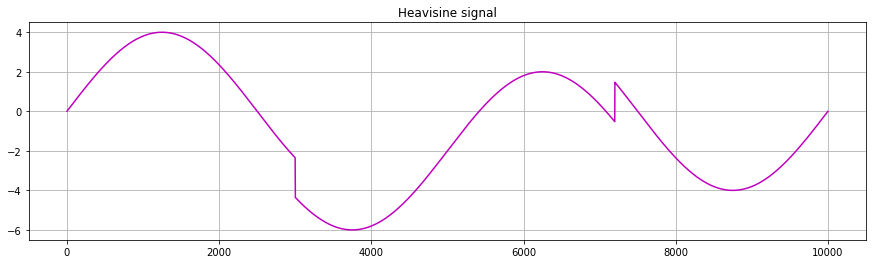

In [6]:
snr_db=15
heavisine=demo_signal(name='HeaviSine',n=10000)
noisy,noise=AWGN(heavisine,snr_db)
approx_det,coeff_det1,coeff_det2,coeff_det3=wavedec(noisy,'db1',level=3)
fig=1
plt.figure(fig,figsize=(15,4))
plt.plot(heavisine,color='m')
plt.title('Heavisine signal')
plt.grid('true')

Text(0, 0.5, 'Approx coefficients')

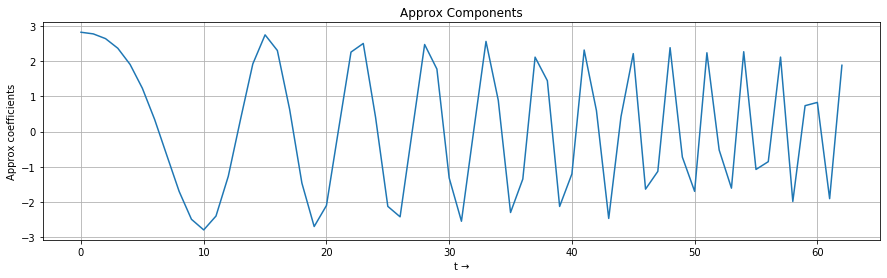

In [7]:
approx_det,coeff_det1,coeff_det2,coeff_det3=wavedec(x,'db1',level=3)
plt.figure(fig,figsize=(15,4))
plt.plot(approx_det)
plt.grid('true')
plt.title('Approx Components')
plt.xlabel('t →')
plt.ylabel('Approx coefficients')

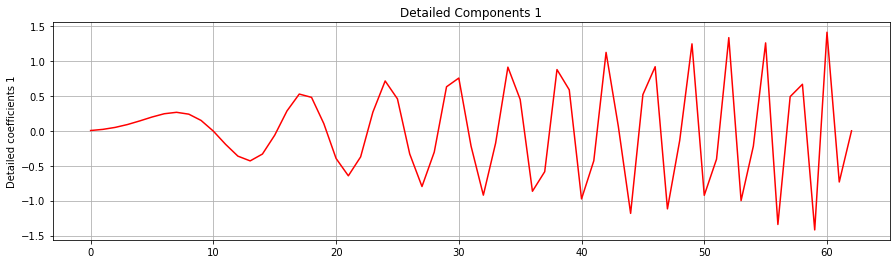

In [8]:
plt.figure(fig,figsize=(15,4))
plt.plot(coeff_det1,color='r')
plt.title('Detailed Components 1')
plt.ylabel('Detailed coefficients 1')
plt.grid('true')

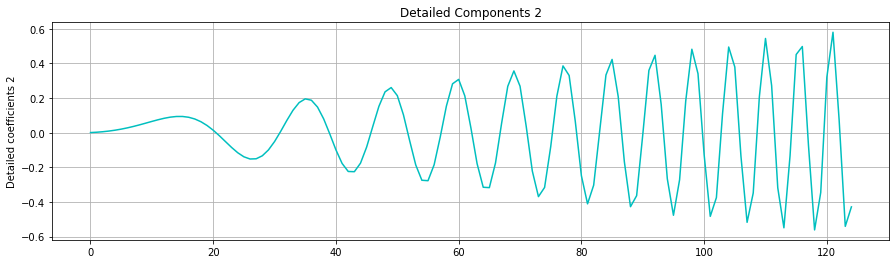

In [9]:
plt.figure(fig,figsize=(15,4))
plt.plot(coeff_det2,color='c')
plt.title('Detailed Components 2')
plt.ylabel('Detailed coefficients 2')
plt.grid('true')

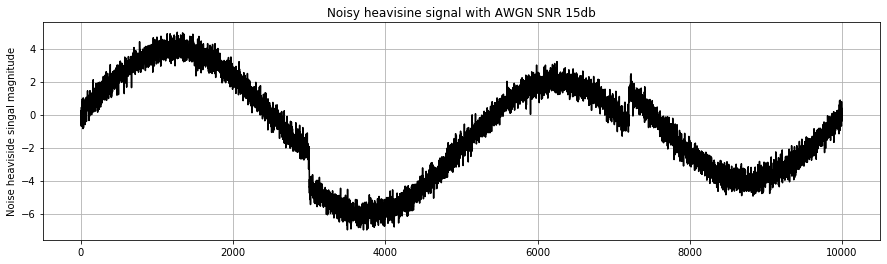

In [10]:
plt.figure(fig,figsize=(15,4))
plt.plot(noisy,color='k')
plt.title('Noisy heavisine signal with AWGN SNR 15db')
plt.ylabel('Noise heaviside singal magnitude')
plt.grid('true')

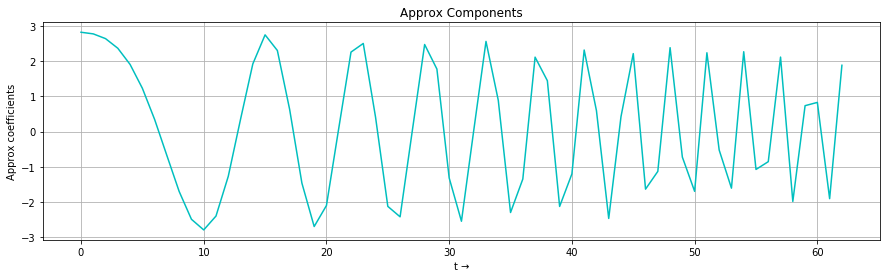

In [11]:
plt.figure(fig,figsize=(15,4))
plt.plot(approx_det,color='c')
plt.title('Approx Components')
plt.xlabel('t →')
plt.ylabel('Approx coefficients')
plt.grid('true')

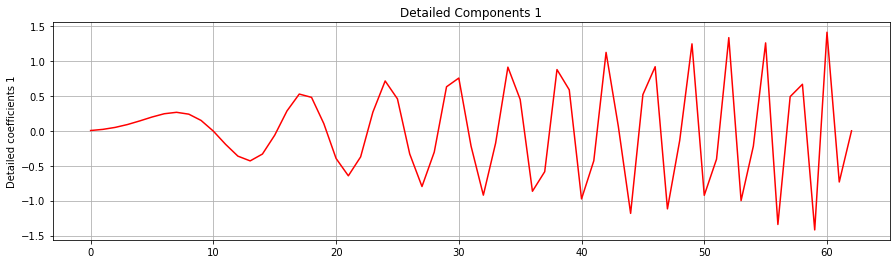

In [12]:
plt.figure(fig,figsize=(15,4))
plt.plot(coeff_det1,color='r')
plt.title('Detailed Components 1')
plt.ylabel('Detailed coefficients 1')
plt.grid('true')

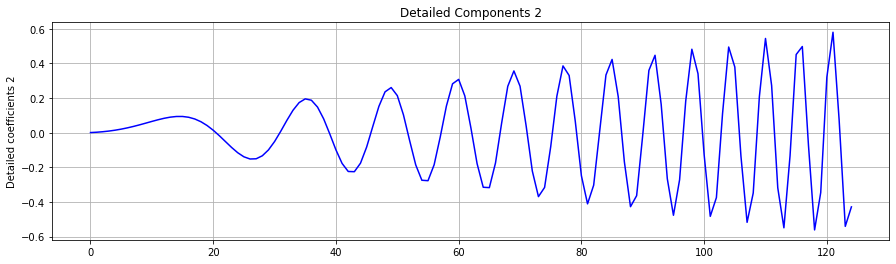

In [13]:
plt.figure(fig,figsize=(15,4))
plt.plot(coeff_det2,color='b')
plt.title('Detailed Components 2')
plt.ylabel('Detailed coefficients 2')
plt.grid('true')

Text(0, 0.5, 'Detailed coefficients 3')

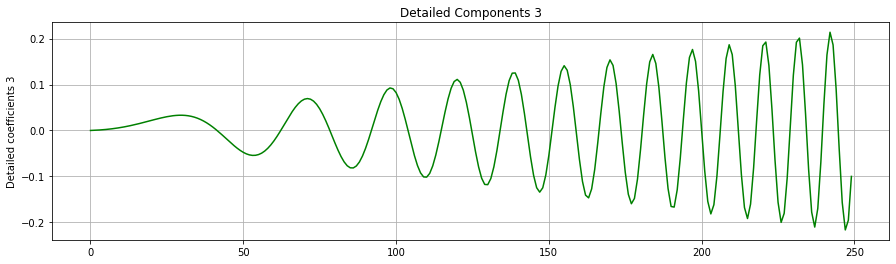

In [14]:
plt.figure(fig,figsize=(15,4))
plt.plot(coeff_det3,color='g')
plt.grid('true')
plt.title('Detailed Components 3')
plt.ylabel('Detailed coefficients 3')

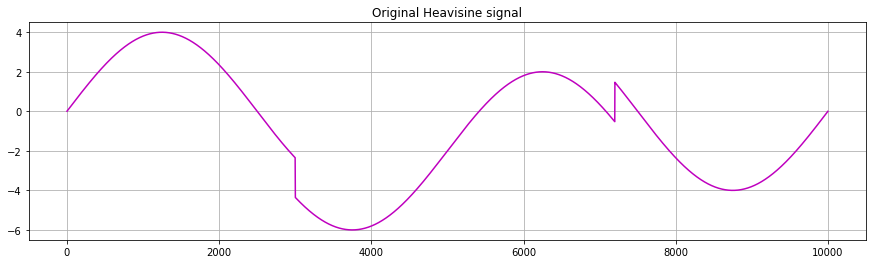

In [15]:
from pywt import waverec
def signum(x):
 return 1*(x>0)+0*(x==0)-1*(x<0) 
def soft_threshold(coff,threshol_val):
  return np.array([(signum(i)*(abs(i)-threshol_val))*(abs(i)>=threshol_val)+0*(abs(i)<threshol_val) for i in coff])
out1=soft_threshold(approx_det,1.5)
out2=soft_threshold(coeff_det1,1.5)
out3=soft_threshold(coeff_det2,1.5)
out4=soft_threshold(coeff_det3,1.5)
out_coff=out1,out2,out3,out4
output= waverec(out_coff, 'db1')
plt.figure(fig,figsize=(15,4))
plt.plot(heavisine,color='m')
plt.title('Original Heavisine signal')
plt.grid('true')

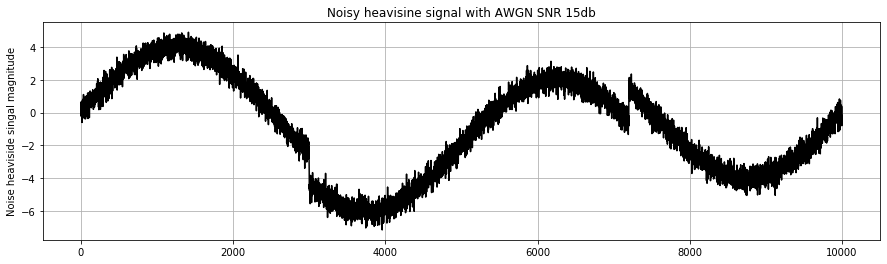

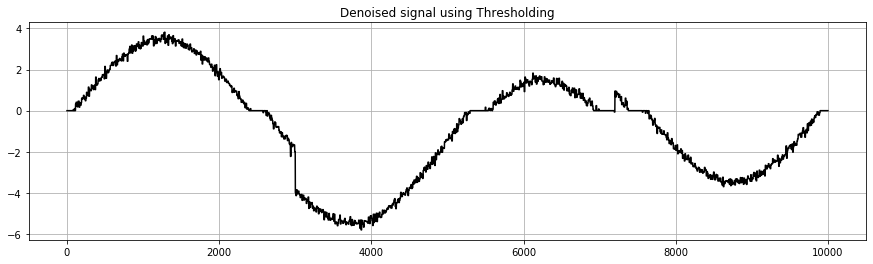

In [23]:
plt.figure(fig,figsize=(15,4))
plt.plot(noisy,color='k')
plt.title('Noisy heavisine signal with AWGN SNR 15db')
plt.ylabel('Noise heaviside singal magnitude')
plt.grid('true')
fig+=1
plt.figure(fig,figsize=(15,4))
plt.plot(output,color='k')
plt.title('Denoised signal using Thresholding')
plt.grid('true')
fig=fig+1